In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
from random import seed
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import adam
from keras import optimizers
from keras.utils import to_categorical
import os

tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [2]:
# Data Processing
dataset = "Training.csv"
categories = ["Background", "Signal"]
samples_class = 11500

In [3]:
print("\n Loading data from database file...")
data =  pd.read_csv(dataset) #.astype(np.float32)


 Loading data from database file...


In [4]:
training = [data.loc[0:9199], data.loc[11500:20699]]
training = pd.concat(training)
training = training.sample(frac=1)
training.reset_index(drop=True, inplace=True)
exporta_csv = training.to_csv(r'a.csv',index=None, header=True)

test = [data.loc[9200:11499], data.loc[20700:22999]]
test = pd.concat(test)
test = test.sample(frac=1)
test.reset_index(drop=True, inplace=True)
exportb_csv = test.to_csv(r'b.csv',index=None, header=True)

In [5]:
print("\n Generating training and test data...")
#Cols info:
# 0 - E1         # 1 - px1         # 2 - py1         # 3 - pz1
# 4 - pt1        # 5 - eta1        # 6 - phi1        # 7 - E2
# 8 - px2        # 9 - py2         # 10 - pz2        # 11 - pt2
# 12 - eta2      # 13 - phi2       # 14 - M          # 15 - Rapidity 
# 16 - Pt        # 17 - Class      # 18 - R(phi)     # 19 - Teta (phi)

x_train = np.loadtxt('a.csv', delimiter = ',', skiprows=1,
                            usecols = (6,13,14), unpack=True)
x_train = x_train.T
y_train = np.loadtxt('a.csv', delimiter = ',', skiprows=1, dtype = 'str', 
                            usecols = (17), unpack=True)

x_test = np.loadtxt('b.csv', delimiter = ',', skiprows=1,
                            usecols = (6,13,14), unpack=True)
x_test = x_test.T
y_test = np.loadtxt('b.csv', delimiter = ',', skiprows=1, dtype = 'str', 
                            usecols = (17), unpack=True)
print("\n Total samples:    {} ".format(len(x_train)+len(x_test)))
print("\n Training samples: {} ".format(len(y_train)))
print("\n Test samples:     {} ".format(len(y_test)))


 Generating training and test data...

 Total samples:    23000 

 Training samples: 18400 

 Test samples:     4600 


In [6]:
del data
del training
del test 
os.remove("a.csv")
os.remove("b.csv")

In [7]:
#===============================================================================
#======================== Model Building =======================================
#===============================================================================
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

epochs = 20
num_features = 3
num_classes = 2
batch_size = 32

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# Build model
print("\n Building model...")
model = Sequential()
model.add(Dropout(0.2))
model.add(Dense(256, input_shape=(3,), activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes,activation=tf.nn.softmax))

print("\n Compiling model...")
opt = adam(lr=0.01, beta_1=0.9, beta_2=0.99, epsilon=None, decay=0.0, amsgrad=False)
# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

#print(model.summary())

print("\n Fitting model...")
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test))


 Building model...

 Compiling model...

 Fitting model...
Train on 18400 samples, validate on 4600 samples
Epoch 1/20
18400/18400 [==============================] - 3s 141us/step - loss: 0.4197 - acc: 0.7982 - val_loss: 0.2235 - val_acc: 0.9815
Epoch 2/20
18400/18400 [==============================] - 2s 82us/step - loss: 0.3445 - acc: 0.8532 - val_loss: 0.3088 - val_acc: 0.8889
Epoch 3/20
18400/18400 [==============================] - 1s 81us/step - loss: 0.3316 - acc: 0.8574 - val_loss: 0.5872 - val_acc: 0.5061
Epoch 4/20
18400/18400 [==============================] - 1s 80us/step - loss: 0.3246 - acc: 0.8557 - val_loss: 0.3335 - val_acc: 0.8857
Epoch 5/20
18400/18400 [==============================] - 2s 82us/step - loss: 0.3130 - acc: 0.8538 - val_loss: 0.2236 - val_acc: 0.9133
Epoch 6/20
18400/18400 [==============================] - 2s 85us/step - loss: 0.2876 - acc: 0.8605 - val_loss: 0.1353 - val_acc: 0.9620
Epoch 7/20
18400/18400 [==============================] - 2s 97us/st

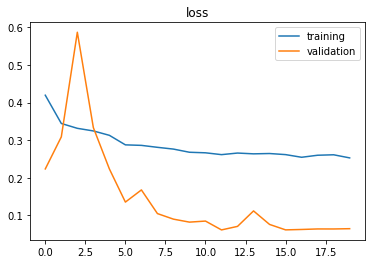

In [9]:
#plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'], label='training')
plt.plot(history.epoch,history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')
plt.show()

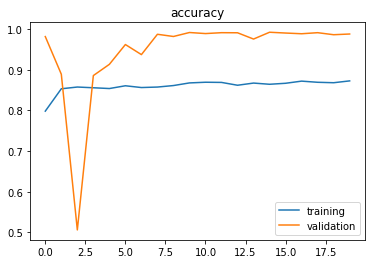

In [10]:
#plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'], label='training')
plt.plot(history.epoch,history.history['val_acc'], label='validation')
plt.title('accuracy')
plt.legend(loc='best')
plt.show()

In [11]:
# Prediction on training data

a = 388
print ('Prediction', model.predict([[x_train[a]]]))
print ('Real Classification', y_train[a])
print ('This event is', categories[int(model.predict([[x_train[a]]])[0][0])])

Prediction [[0.00582815 0.9941718 ]]
Real Classification [0. 1.]
This event is Background


In [12]:
# Prediction with test data
dataset2 = "TestData.csv"

In [15]:
#Cols info:
# 0 - E1         # 1 - px1         # 2 - py1         # 3 - pz1
# 4 - pt1        # 5 - eta1        # 6 - phi1        # 7 - E2
# 8 - px2        # 9 - py2         # 10 - pz2        # 11 - pt2
# 12 - eta2      # 13 - phi2       # 14 - M          # 15 - Rapidity
# 16 - Pt        # 17 - R(phi)     # 19 - Teta (phi)
x_Test = np.loadtxt(dataset2, delimiter = ',', skiprows=1,
                            usecols = (6,13,14), unpack=True)
x_Test = x_Test.T
x_Test = tf.keras.utils.normalize(x_Test, axis=1)

In [16]:
# Choose a number from 0 to 10342
b = 10342
print ('Prediction', model.predict([[x_Test[b]]]))
print ('This event is', categories[int(model.predict([[x_Test[b]]])[0][0])])

Prediction [[9.999994e-01 5.842503e-07]]
This event is Background


In [ ]:
print (x_Test[b])